# WeatherPy
----

### Analysis - February 2019
1. We can observe that latitude increases as temperature decreases. You can see a strong relationship between these 2 variables with only a few outliers.

2. No other strong relationship is found when observing latitude and cloudiness, latitude and wind speed, or latitude and humidity. We can conclude there is a neutral correlation between these variables

3. We can observe that when latitude increases to more than 20 some northern hemisphere countries can experience higher wind speeds

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API key
import api_keys
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


#Variable to populate today's date
today = time.strftime("%m_%d_%Y")


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

#create DataFrame to later populate values
cities_n = {
    "City": cities}
weather_data = pd.DataFrame(cities_n)
weather_data.head()

weather_data["Cloudiness"] = ""
weather_data["Country"] = ""
weather_data["Date"] = ""
weather_data["Humidity"] = ""
weather_data["Lat"] = ""
weather_data["Lng"] = ""
weather_data["Max Temp"] = ""
weather_data["Wind Speed"] = ""

#Display DataFrame

weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,jacareacanga,,,,,,,,
1,joensuu,,,,,,,,
2,bethel,,,,,,,,
3,tuktoyaktuk,,,,,,,,
4,mar del plata,,,,,,,,


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Create elements for URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"
cities = weather_data["City"]

# Build query URL
query_url = f"{url}&units={units}&appid={api_key}&q="

#Create lists to hold values
name = []
Cloudiness = []
Country = []
Date = []
Humidity = []
Lat = []
Lng = []
Max_Temp = []
Wind_Speed = []
counter = 1

#Printing initial message

print(f"Beginning Data Retrieval ")
print("--------------------------")

#looping to find cities in DataFrame, and append information to lists

for city in cities:
# Creating try and except to avoid errors for cities not found    
    try:
        # Create request
        response = requests.get(query_url + city).json() 
       
        # Append information to lists
        name.append(response['name'])
        Cloudiness.append(response['clouds']['all'])
        Country.append(response['sys']['country'])
        Date.append(response['dt'])
        Humidity.append(response['main']['humidity'])
        Lat.append(response['coord']['lat'])
        Lng.append(response['coord']['lon'])
        Max_Temp.append(response['main']['temp_max'])
        Wind_Speed.append(response['wind']['speed'])
        
        #Printing
        city = response['name']
        #Replacing spaces to obtain correct URL
        city1 = city.replace(" ","%20")
        print(f"Processing Record: {counter} | {city}")
        print(f"{query_url}{city1}")
        counter = counter + 1
        
    except:
        print("City not found... skipping.")

#Printing final message 
print("--------------------------")
print("Data Retrieval Complete")
print("--------------------------")

Beginning Data Retrieval 
--------------------------
Processing Record: 1 | Jacareacanga
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=b2cf96693b6bf554841e7aae54879eee&q=Jacareacanga
Processing Record: 2 | Joensuu
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=b2cf96693b6bf554841e7aae54879eee&q=Joensuu
Processing Record: 3 | Bethel
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=b2cf96693b6bf554841e7aae54879eee&q=Bethel
Processing Record: 4 | Tuktoyaktuk
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=b2cf96693b6bf554841e7aae54879eee&q=Tuktoyaktuk
Processing Record: 5 | Mar del Plata
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=b2cf96693b6bf554841e7aae54879eee&q=Mar%20del%20Plata
Processing Record: 6 | Bredasdorp
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=b2cf96693b6bf554841e7aae54879eee&q=Bredasdorp
Processing Record: 7 | Rocha
http://api.openweather

Processing Record: 55 | Hilo
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=b2cf96693b6bf554841e7aae54879eee&q=Hilo
Processing Record: 56 | Kapaa
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=b2cf96693b6bf554841e7aae54879eee&q=Kapaa
Processing Record: 57 | Port Alfred
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=b2cf96693b6bf554841e7aae54879eee&q=Port%20Alfred
Processing Record: 58 | Sioux Lookout
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=b2cf96693b6bf554841e7aae54879eee&q=Sioux%20Lookout
Processing Record: 59 | Russkaya Polyana
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=b2cf96693b6bf554841e7aae54879eee&q=Russkaya%20Polyana
Processing Record: 60 | Nanortalik
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=b2cf96693b6bf554841e7aae54879eee&q=Nanortalik
Processing Record: 61 | Vao
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid

Processing Record: 111 | Saldanha
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=b2cf96693b6bf554841e7aae54879eee&q=Saldanha
Processing Record: 112 | Plaeng Yao
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=b2cf96693b6bf554841e7aae54879eee&q=Plaeng%20Yao
Processing Record: 113 | Greencastle
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=b2cf96693b6bf554841e7aae54879eee&q=Greencastle
Processing Record: 114 | Saint George
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=b2cf96693b6bf554841e7aae54879eee&q=Saint%20George
Processing Record: 115 | Vostok
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=b2cf96693b6bf554841e7aae54879eee&q=Vostok
Processing Record: 116 | Kaolinovo
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=b2cf96693b6bf554841e7aae54879eee&q=Kaolinovo
Processing Record: 117 | Geraldton
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&

Processing Record: 165 | Scarborough
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=b2cf96693b6bf554841e7aae54879eee&q=Scarborough
Processing Record: 166 | Havre-Saint-Pierre
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=b2cf96693b6bf554841e7aae54879eee&q=Havre-Saint-Pierre
Processing Record: 167 | Northam
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=b2cf96693b6bf554841e7aae54879eee&q=Northam
Processing Record: 168 | Coahuayana
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=b2cf96693b6bf554841e7aae54879eee&q=Coahuayana
Processing Record: 169 | Coos Bay
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=b2cf96693b6bf554841e7aae54879eee&q=Coos%20Bay
Processing Record: 170 | Yashkul
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=b2cf96693b6bf554841e7aae54879eee&q=Yashkul
Processing Record: 171 | Boyabat
http://api.openweathermap.org/data/2.5/weather?&units=Imp

Processing Record: 219 | Sao Filipe
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=b2cf96693b6bf554841e7aae54879eee&q=Sao%20Filipe
Processing Record: 220 | Awjilah
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=b2cf96693b6bf554841e7aae54879eee&q=Awjilah
Processing Record: 221 | Lyubinskiy
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=b2cf96693b6bf554841e7aae54879eee&q=Lyubinskiy
Processing Record: 222 | Bambanglipuro
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=b2cf96693b6bf554841e7aae54879eee&q=Bambanglipuro
Processing Record: 223 | Wichita Falls
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=b2cf96693b6bf554841e7aae54879eee&q=Wichita%20Falls
Processing Record: 224 | Thompson
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=b2cf96693b6bf554841e7aae54879eee&q=Thompson
Processing Record: 225 | Kodiak
http://api.openweathermap.org/data/2.5/weather?&units=Im

Processing Record: 274 | Malanje
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=b2cf96693b6bf554841e7aae54879eee&q=Malanje
Processing Record: 275 | Hami
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=b2cf96693b6bf554841e7aae54879eee&q=Hami
Processing Record: 276 | La Serena
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=b2cf96693b6bf554841e7aae54879eee&q=La%20Serena
Processing Record: 277 | Nexo
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=b2cf96693b6bf554841e7aae54879eee&q=Nexo
Processing Record: 278 | Keuruu
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=b2cf96693b6bf554841e7aae54879eee&q=Keuruu
Processing Record: 279 | Paamiut
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=b2cf96693b6bf554841e7aae54879eee&q=Paamiut
Processing Record: 280 | Vidim
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=b2cf96693b6bf554841e7aae54879eee&q=Vid

Processing Record: 329 | Faanui
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=b2cf96693b6bf554841e7aae54879eee&q=Faanui
Processing Record: 330 | Fukue
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=b2cf96693b6bf554841e7aae54879eee&q=Fukue
Processing Record: 331 | Lagoa
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=b2cf96693b6bf554841e7aae54879eee&q=Lagoa
Processing Record: 332 | Kasongo-Lunda
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=b2cf96693b6bf554841e7aae54879eee&q=Kasongo-Lunda
Processing Record: 333 | Sobolevo
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=b2cf96693b6bf554841e7aae54879eee&q=Sobolevo
Processing Record: 334 | Davila
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=b2cf96693b6bf554841e7aae54879eee&q=Davila
Processing Record: 335 | Tanout
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=b2cf96693b6bf554841e7aae548

Processing Record: 384 | Ko Samui
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=b2cf96693b6bf554841e7aae54879eee&q=Ko%20Samui
Processing Record: 385 | Kavaratti
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=b2cf96693b6bf554841e7aae54879eee&q=Kavaratti
Processing Record: 386 | Somerset
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=b2cf96693b6bf554841e7aae54879eee&q=Somerset
Processing Record: 387 | Kavieng
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=b2cf96693b6bf554841e7aae54879eee&q=Kavieng
Processing Record: 388 | Constitucion
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=b2cf96693b6bf554841e7aae54879eee&q=Constitucion
Processing Record: 389 | Timbiqui
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=b2cf96693b6bf554841e7aae54879eee&q=Timbiqui
Processing Record: 390 | Port Elizabeth
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid

Processing Record: 438 | Biltine
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=b2cf96693b6bf554841e7aae54879eee&q=Biltine
Processing Record: 439 | Kendari
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=b2cf96693b6bf554841e7aae54879eee&q=Kendari
Processing Record: 440 | San Quintin
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=b2cf96693b6bf554841e7aae54879eee&q=San%20Quintin
Processing Record: 441 | Santa Cruz
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=b2cf96693b6bf554841e7aae54879eee&q=Santa%20Cruz
Processing Record: 442 | Maragogi
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=b2cf96693b6bf554841e7aae54879eee&q=Maragogi
Processing Record: 443 | Richards Bay
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=b2cf96693b6bf554841e7aae54879eee&q=Richards%20Bay
Processing Record: 444 | Reshetylivka
http://api.openweathermap.org/data/2.5/weather?&units=Imperi

Processing Record: 493 | Ormond Beach
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=b2cf96693b6bf554841e7aae54879eee&q=Ormond%20Beach
Processing Record: 494 | Ferkessedougou
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=b2cf96693b6bf554841e7aae54879eee&q=Ferkessedougou
Processing Record: 495 | Lamar
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=b2cf96693b6bf554841e7aae54879eee&q=Lamar
Processing Record: 496 | Aravissos
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=b2cf96693b6bf554841e7aae54879eee&q=Aravissos
Processing Record: 497 | Berlevag
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=b2cf96693b6bf554841e7aae54879eee&q=Berlevag
City not found... skipping.
City not found... skipping.
Processing Record: 498 | Shinpokh
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=b2cf96693b6bf554841e7aae54879eee&q=Shinpokh
Processing Record: 499 | Rio Grande
http://a

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
#Creating new DataFrame to populate values

cities_data = pd.DataFrame()
cities_data['City'] = name
cities_data['Cloudiness'] = Cloudiness
cities_data['Country'] = Country
cities_data['Date'] = Date
cities_data['Humidity'] = Humidity
cities_data['Lat'] = Lat
cities_data['Lng'] = Lng
cities_data['Max Temp'] = Max_Temp
cities_data['Wind Speed'] = Wind_Speed

#Saving file as CSV
cities_data.to_csv(f"output_data_file_{today}.csv", index=False)

#Displaying DataFrame
cities_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Jacareacanga,64,BR,1551061874,96,-6.22,-57.76,73.98,2.71
1,Joensuu,90,FI,1551059400,86,62.60,29.76,35.60,10.29
2,Bethel,40,US,1551060660,93,60.79,-161.76,35.60,11.41
3,Tuktoyaktuk,75,CA,1551060000,78,69.44,-133.03,10.40,5.82
4,Mar del Plata,12,AR,1551061759,77,-46.43,-67.52,44.50,8.75


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

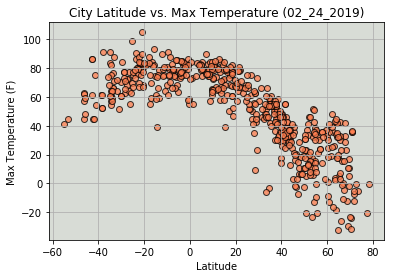

In [5]:
#Creating plot
fig, ax = plt.subplots()

# Identifying X & Y axis 

x_axis = cities_data['Lat']
y_axis = cities_data['Max Temp']

#plotting
plt.scatter(x_axis , y_axis, marker="o", facecolor="coral", edgecolors="black", alpha=0.75)

# Incorporate grid, title and labels
ax.grid(True)
ax.set_facecolor('xkcd:light grey')

plt.title(f"City Latitude vs. Max Temperature ({today})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")


# Save Figure

plt.savefig(f"City Latitude vs. Max Temperature_{today}.png")

# Displaying plot
plt.show()

#### Latitude vs. Humidity Plot

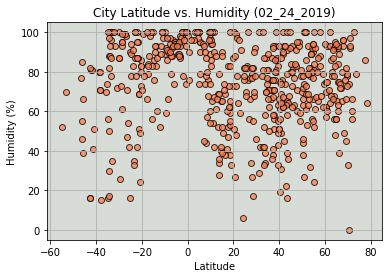

In [6]:
#Creating plot
fig, ax = plt.subplots()

# Identifying X & Y axis 
x_axis = cities_data['Lat']
y_axis = cities_data['Humidity']

#plotting
plt.scatter(x_axis , y_axis, marker="o", facecolor="Coral", edgecolors="black", alpha=0.75)

# Incorporate grid, title and labels
ax.grid(True)
ax.set_facecolor('xkcd:light grey')
plt.title(f"City Latitude vs. Humidity ({today})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save Figure
plt.savefig(f"City Latitude vs. Max Humidity_{today}.png")

# Displaying plot
plt.show()

#### Latitude vs. Cloudiness Plot

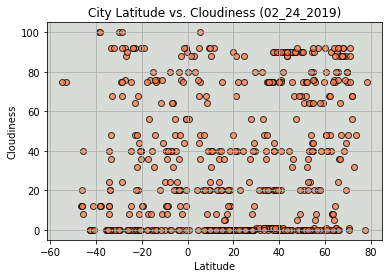

In [7]:
#Creating plot
fig, ax = plt.subplots()

# Identifying X & Y axis 
x_axis = cities_data['Lat']
y_axis = cities_data['Cloudiness']

#plotting
plt.scatter(x_axis , y_axis, marker="o", facecolor="Coral", edgecolors="black", alpha=0.75)

# Incorporate grid, title and labels
ax.grid(True)
ax.set_facecolor('xkcd:light grey')
plt.title(f"City Latitude vs. Cloudiness ({today})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

# Save Figure
plt.savefig(f"City Latitude vs. Cloudiness_{today}.png")

# Displaying plot
plt.show()

#### Latitude vs. Wind Speed Plot

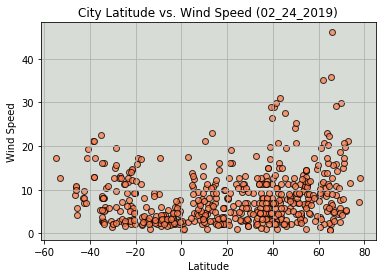

In [8]:
#Creating plot
fig, ax = plt.subplots()

# Identifying X & Y axis 
x_axis = cities_data['Lat']
y_axis = cities_data['Wind Speed']

#plotting
plt.scatter(x_axis , y_axis, marker="o", facecolor="Coral", edgecolors="black", alpha=0.75)

# Incorporate grid, title and labels
ax.grid(True)
ax.set_facecolor('xkcd:light grey')
plt.title(f"City Latitude vs. Wind Speed ({today})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

# Save Figure
plt.savefig(f"City Latitude vs. Wind Speed_{today}.png")

# Displaying plot
plt.show()